<a href="https://colab.research.google.com/github/rmorlowski/Generalized-Linear-Models/blob/master/Auto_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Auto Insurance
### Predict the probability of a car crash
https://www.kaggle.com/c/auto-insurance-411-fall-2018

The deliverable is to analyze insurance data to predict the probability of a car crash. This will be accomplished through exploratory data analysis and by generating logistic regression models. Different variable selection techniques including but not limited to forward, stepwise, and backward regression will be tested to improve model performance. From these techniques, the best model will be selected by considering goodness-of-fit, complexity, and coefficient behavior. The best model will then be further analyzed to determine if it is an adequate model to predict the likelihood of a car accident or if further analysis or data transformation is necessary.

train_auto is the insurance training data with 8000+ records.
This program creates some new variables runs logistic regression to find new models, merges two files(probability and amount) for test_auto data and gives code for lift chart

In [0]:
# import packages for this example
import pandas as pd      
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import statsmodels.formula.api as smf  # R-like model specification
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import pandas_profiling
from scipy import stats
import seaborn as sns
 
get_ipython().magic(u'matplotlib inline')

In [0]:
#Set some display options   
pd.set_option('display.notebook_repr_html', False) 
pd.set_option('display.max_columns', 40) 
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 120)

In [198]:
# Import file to google colaboratory
from google.colab import files
# upload the train dataset
uploaded = files.upload()

Saving train_auto.csv to train_auto (2).csv


In [0]:
import io
#read in the train auto ins dataset
train = pd.read_csv('train_auto.csv')

In [200]:
# Import file to google colaboratory
# upload the test dataset
uploaded = files.upload()

Saving test_auto.csv to test_auto (2).csv


In [0]:
#Read in the test auto ins dataset
test = pd.read_csv('test_auto.csv')

In [202]:
#A good step to take is to convert all variable names to lower case
train.columns = [s.lower() for s in train.columns]
test.columns = [s.lower() for s in train.columns]
train.head()
train.shape

(8161, 26)

In [203]:
print('')
print('----- Summary of Input Data -----')
print('')


----- Summary of Input Data -----



In [204]:
# show the object is a DataFrame
print('Object type: ', type(train))

Object type:  <class 'pandas.core.frame.DataFrame'>


In [205]:
# show number of observations in the DataFrame
print('Number of observations: ', len(train))

Number of observations:  8161


In [206]:
# show variable names
print('Variable names: ', train.columns)

Variable names:  Index(['index', 'target_flag', 'target_amt', 'kidsdriv', 'age', 'homekids', 'yoj', 'income', 'parent1', 'home_val',
       'mstatus', 'sex', 'education', 'job', 'travtime', 'car_use', 'bluebook', 'tif', 'car_type', 'red_car',
       'oldclaim', 'clm_freq', 'revoked', 'mvr_pts', 'car_age', 'urbanicity'],
      dtype='object')


In [207]:
print('----train dataset column types information-------')
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

----train dataset column types information-------


  Column Type  Count
0       int64      8
1     float64      4
2      object     14

In [208]:
#Do we have missing values? 
datasetHasNan = False
if train.count().min() == train.shape[0] and test.count().min() == test.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    datasetHasNan = True
    print('oops we have nan')

oops we have nan


In [209]:
#Check for missing data & list them 
if datasetHasNan == True:
    nas = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    print(nas[nas.sum(axis=1) > 0])

Nan in the data sets
             Train Dataset  Test Dataset
target_flag              0          2141
target_amt               0          2141
age                      6             1
yoj                    454            94
income                 445           125
home_val               464           111
job                    526           139
car_age                510           129


In [210]:
# show descriptive statistics
print(train.describe())

              index  target_flag     target_amt     kidsdriv          age     homekids          yoj     travtime  \
count   8161.000000  8161.000000    8161.000000  8161.000000  8155.000000  8161.000000  7707.000000  8161.000000   
mean    5151.867663     0.263816    1504.324648     0.171057    44.790313     0.721235    10.499286    33.485725   
std     2978.893962     0.440728    4704.026930     0.511534     8.627589     1.116323     4.092474    15.908333   
min        1.000000     0.000000       0.000000     0.000000    16.000000     0.000000     0.000000     5.000000   
25%     2559.000000     0.000000       0.000000     0.000000    39.000000     0.000000     9.000000    22.000000   
50%     5133.000000     0.000000       0.000000     0.000000    45.000000     0.000000    11.000000    33.000000   
75%     7745.000000     1.000000    1036.000000     0.000000    51.000000     1.000000    13.000000    44.000000   
max    10302.000000     1.000000  107586.136160     4.000000    81.00000

In [0]:
#pandas_profiling.ProfileReport(train)

In [0]:
# Clean the currency columns to numeric for train data
train['bluebook'] = train['bluebook'].str.replace(',', '')
train['bluebook'] = train['bluebook'].str.replace('$', '')
train['income'] = train['income'].str.replace(',', '')
train['income'] = train['income'].str.replace('$', '')
train['home_val'] = train['home_val'].str.replace(',', '')
train['home_val'] = train['home_val'].str.replace('$', '')
train['oldclaim'] = train['oldclaim'].str.replace(',', '')
train['oldclaim'] = train['oldclaim'].str.replace('$', '')

cols = ['bluebook', 'income', 'home_val','oldclaim']
train[cols] = train[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [0]:
# Clean the currency columns to numeric for test data
test['bluebook'] = test['bluebook'].str.replace(',', '')
test['bluebook'] = test['bluebook'].str.replace('$', '')
test['income'] = test['income'].str.replace(',', '')
test['income'] = test['income'].str.replace('$', '')
test['home_val'] = test['home_val'].str.replace(',', '')
test['home_val'] = test['home_val'].str.replace('$', '')
test['oldclaim'] = test['oldclaim'].str.replace(',', '')
test['oldclaim'] = test['oldclaim'].str.replace('$', '')

cols = ['bluebook', 'income', 'home_val','oldclaim']
test[cols] = test[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [0]:
# We have one record that contains a negative car age.  Unless someone is buying a car "in the future" this does not seem possible.
# Let's drop this record as I believe this data is invalid
train1 = train[train.car_age > -2]

In [0]:
#watch the count it will tell you if a variable has some missing values that you will need to deal with
train1=train1.fillna(0)

# age = mean (normal)
m0 = np.mean(train1.age[train1.age>0])
train1 = train1.replace({'age': {0: m0}})
#pct1, pct99 = train1.age.quantile([0.01,0.99])
#train1.age.clip(lower = pct1, upper = pct99, inplace = True)
# bluebook = median (skewed)
m1 = np.median(train1.bluebook[train1.bluebook>0])
train1 = train1.replace({'bluebook': {0: m1}})
pct1, pct99 = train1.bluebook.quantile([0.01,0.99])
train1.bluebook.clip(lower = pct1, upper = pct99, inplace = True)
# car_age = mean
m2 = np.mean(train1.car_age[train1.car_age>0])
train1 = train1.replace({'car_age': {0: m2}})
pct1, pct99 = train1.car_age.quantile([0.01,0.99])
train1.car_age.clip(lower = pct1, upper = pct99, inplace = True)
# clm_freq = median (skewed)
m3 = np.median(train1.clm_freq[train1.clm_freq>0])
train1 = train1.replace({'clm_freq': {0: m3}})
pct1, pct99 = train1.clm_freq.quantile([0.01,0.99])
train1.clm_freq.clip(lower = pct1, upper = pct99, inplace = True)
# homekids (skewed)
#m4 = np.median(train1.homekids[train1.homekids>0])
#train1 = train1.replace({'homekids': {0: m4}})
#pct1, pct99 = train1.homekids.quantile([0.01,0.99])
#train1.homekids.clip(lower = pct1, upper = pct99, inplace = True)
# home_val = median (skewed)
m5 = np.median(train1.home_val[train1.home_val>0])
train1 = train1.replace({'home_val': {0: m5}})
pct1, pct99 = train1.home_val.quantile([0.01,0.99])
train1.home_val.clip(lower = pct1, upper = pct99, inplace = True)
# income = median (skewed)
m6 = np.median(train1.income[train1.income>0])
train1 = train1.replace({'income': {0: m6}})
pct1, pct99 = train1.income.quantile([0.01,0.99])
train1.income.clip(lower = pct1, upper = pct99, inplace = True)
# kidsdriv = median (skewed)
#m7 = np.median(train1.kidsdriv[train1.kidsdriv>0])
#train1 = train1.replace({'kidsdriv': {0: m7}})
#pct1, pct99 = train1.kidsdriv.quantile([0.01,0.99])
#train1.kidsdriv.clip(lower = pct1, upper = pct99, inplace = True)
# mvr_pts = median (skewed)
m8 = np.median(train1.mvr_pts[train1.mvr_pts>0])
train1 = train1.replace({'mvr_pts': {0: m8}})
pct1, pct99 = train1.mvr_pts.quantile([0.01,0.99])
train1.mvr_pts.clip(lower = pct1, upper = pct99, inplace = True)
# oldclaim = median (skewed)
m9 = np.median(train1.oldclaim[train1.oldclaim>0])
train1 = train1.replace({'oldclaim': {0: m9}})
pct1, pct99 = train1.oldclaim.quantile([0.01,0.99])
train1.oldclaim.clip(lower = pct1, upper = pct99, inplace = True)
# tif = median (skewed)
m10 = np.median(train1.tif[train1.tif>0])
train1 = train1.replace({'tif': {0: m10}})
pct1, pct99 = train1.tif.quantile([0.01,0.99])
train1.tif.clip(lower = pct1, upper = pct99, inplace = True)
# travtime = median (skewed)
m11 = np.median(train1.travtime[train1.travtime>0])
train1 = train1.replace({'travtime': {0: m11}})
pct1, pct99 = train1.travtime.quantile([0.01,0.99])
train1.travtime.clip(lower = pct1, upper = pct99, inplace = True)
# yoj = median (skewed)
m12 = np.median(train1.yoj[train1.yoj>0])
train1 = train1.replace({'yoj': {0: m12}})
pct1, pct99 = train1.yoj.quantile([0.01,0.99])
train1.yoj.clip(lower = pct1, upper = pct99, inplace = True)

#print(train1.describe())

In [0]:
#Make sure whatever you do to the training data you also do to the test data otherwise your model will not score properly
test1=test.fillna(0)

test1=test1.replace({'age': {0: m0}})
#pct1, pct99 = train1.age.quantile([0.01,0.99])
#test1.age.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'bluebook': {0: m1}})
pct1, pct99 = train1.bluebook.quantile([0.01,0.99])
test1.bluebook.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'car_age': {0: m2}})
pct1, pct99 = train1.car_age.quantile([0.01,0.99])
test1.car_age.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'clm_freq': {0: m3}})
pct1, pct99 = train1.clm_freq.quantile([0.01,0.99])
test1.clm_freq.clip(lower = pct1, upper = pct99, inplace = True)
#test1=test1.replace({'homekids': {0: m4}})
#pct1, pct99 = train1.homekids.quantile([0.01,0.99])
#test1.homekids.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'home_val': {0: m5}})
pct1, pct99 = train1.home_val.quantile([0.01,0.99])
test1.home_val.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'income': {0: m6}})
pct1, pct99 = train1.income.quantile([0.01,0.99])
test1.income.clip(lower = pct1, upper = pct99, inplace = True)
#test1=test1.replace({'kidsdriv': {0: m7}})
#pct1, pct99 = train1.kidsdriv.quantile([0.01,0.99])
#test1.kidsdriv.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'mvr_pts': {0: m8}})
pct1, pct99 = train1.mvr_pts.quantile([0.01,0.99])
test1.mvr_pts.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'oldclaim': {0: m9}})
pct1, pct99 = train1.oldclaim.quantile([0.01,0.99])
test1.oldclaim.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'tif': {0: m10}})
pct1, pct99 = train1.tif.quantile([0.01,0.99])
test1.tif.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'travtime': {0: m11}})
pct1, pct99 = train1.travtime.quantile([0.01,0.99])
test1.travtime.clip(lower = pct1, upper = pct99, inplace = True)
test1=test1.replace({'yoj': {0: m12}})
pct1, pct99 = train1.yoj.quantile([0.01,0.99])
test1.yoj.clip(lower = pct1, upper = pct99, inplace = True)

#print(test1.describe())

In [0]:
# round age, someone can't be 44.8 years old
train1.age = train1.age.round()
test1.age = test1.age.round()

In [218]:
print('')
print('----- Exploratory Data Analysis -----')
print('')


----- Exploratory Data Analysis -----



Text(0, 0.5, '# of Crashes')

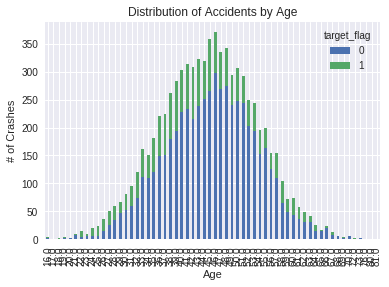

In [219]:
# Let's look at the distribution of the accidents "target_flag" by age
df_plot = train1.groupby(['target_flag', 'age']).size().reset_index().pivot(columns='target_flag', index='age', values=0)
df_plot.plot(x=df_plot.index, kind='bar', stacked=True)
plt.title('Distribution of Accidents by Age')
plt.xlabel('Age')
plt.ylabel('# of Crashes')

Text(0, 0.5, 'Proportion of Target Flag')

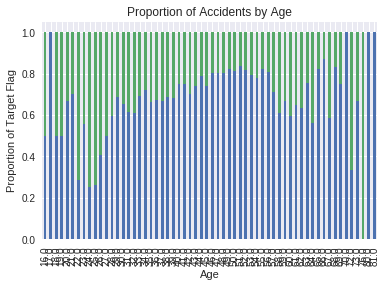

In [220]:
# Let's look at the proportion of the target flag by age
table=pd.crosstab(train1.age,train1.target_flag)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, legend=None)
plt.title('Proportion of Accidents by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Target Flag')

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Distribution of Age')

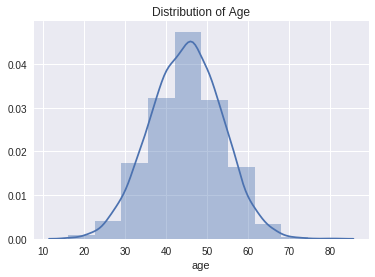

In [221]:
#Distribution Plot (Histogram of age)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))
sns.distplot(train1.age, bins=10).set_title('Distribution of Age')
#Histogram confirms relatively normal distribution.

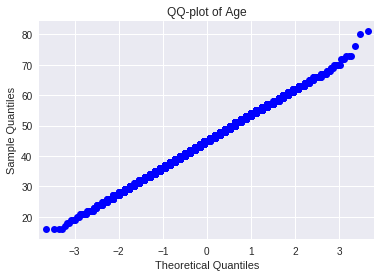

In [222]:
# create qqplot of age - confirms skewing in the tails
sm.qqplot(train1['age'])
plt.title('QQ-plot of Age') 
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Distribution of Old Claim')

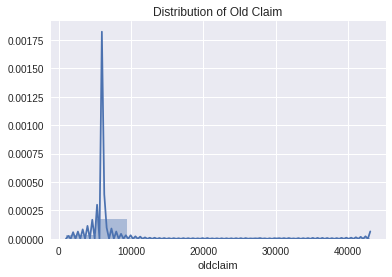

In [223]:
#Distribution Plot (Histogram of age)
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))
sns.distplot(train1.oldclaim, bins=10).set_title('Distribution of Old Claim')
#Histogram shows highly skewed distribution

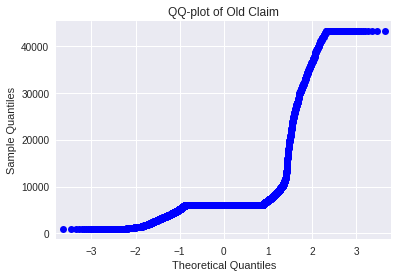

In [224]:
# qqplot of old claim confirms this variable is not normally distributed
sm.qqplot(train1['oldclaim'])
plt.title('QQ-plot of Old Claim') 
plt.show()

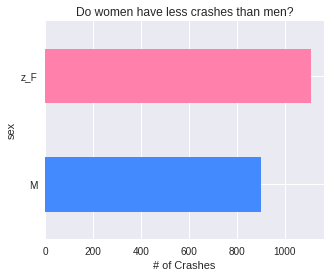

In [225]:
# urban legend says that women have less crashes than men.  Is that true?
train_crash = train1[train1['target_amt'] != 0]
train_crash.groupby('sex').index.count().\
    sort_values().\
    plot(kind='barh', figsize=(5,4), color=('#448AFF','#FF80AB'))
plt.xlabel('# of Crashes')
plt.title('Do women have less crashes than men?')
plt.show()
# No, women appear to have more crashes than men.

Text(0, 0.5, 'Sex')

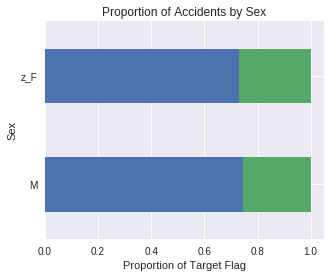

In [226]:
# Let's look at the proportion of the target flag by sex
table=pd.crosstab(train1.sex,train1.target_flag)
table.div(table.sum(1).astype(float), axis=0).plot(kind='barh', figsize=(5,4), stacked=True, legend=None)
plt.title('Proportion of Accidents by Sex')
plt.xlabel('Proportion of Target Flag')
plt.ylabel('Sex')

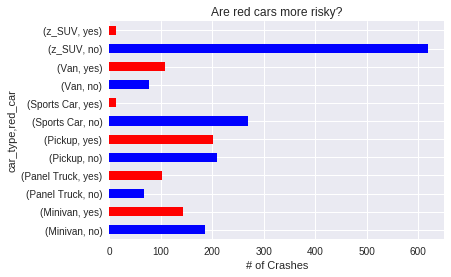

In [227]:
# urban legend says that red cars (especially red sport cars) are more risky.  Is that true?
train_crash.groupby(['car_type','red_car']).index.count().plot(kind='barh', figsize=(6,4),color=('b','r','b','r','b','r','b','r','b','r','b','r'))
plt.title('Are red cars more risky?')
plt.xlabel('# of Crashes')
plt.show()
# No, red vehicles appear to be less risky especially sports cars.

index              AxesSubplot(0.125,0.71587;0.133621x0.16413)
target_flag     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
target_amt       AxesSubplot(0.44569,0.71587;0.133621x0.16413)
kidsdriv        AxesSubplot(0.606034,0.71587;0.133621x0.16413)
age             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
                                    ...                       
tif            AxesSubplot(0.285345,0.321957;0.133621x0.16413)
oldclaim        AxesSubplot(0.44569,0.321957;0.133621x0.16413)
clm_freq       AxesSubplot(0.606034,0.321957;0.133621x0.16413)
mvr_pts        AxesSubplot(0.766379,0.321957;0.133621x0.16413)
car_age              AxesSubplot(0.125,0.125;0.133621x0.16413)
Length: 16, dtype: object

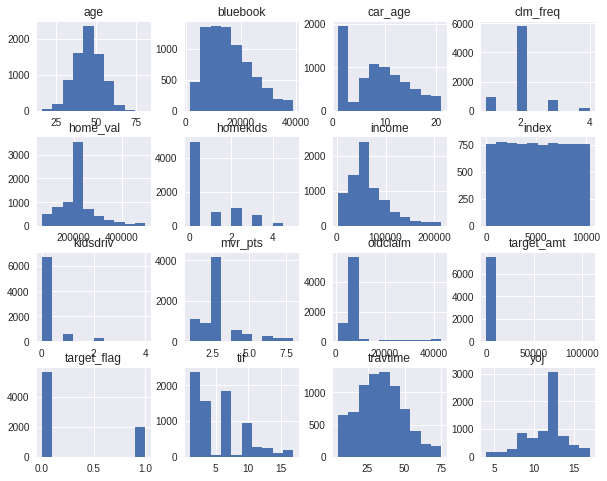

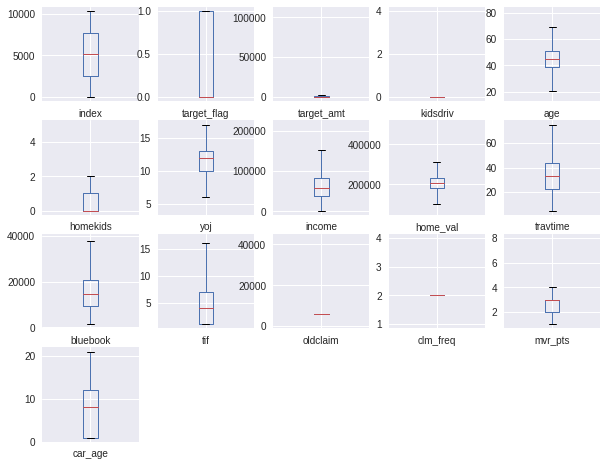

In [228]:
#///Do some EDA///;
#Some quick plots of the data
train1.hist(figsize=(10,8))
train1.plot(kind= 'box' , subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(10,8))

In [229]:
# Check the skewness and kurtosis of each variable
# Is skew close to zero 0?  Is kurtosis close to three 0.0?
print('age Skew: {:.3f} | Kurtosis: {:.3f}'.format(  #use median
    train.age.skew(), train.age.kurtosis()))
print('bluebook Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.bluebook.skew(), train.bluebook.kurtosis()))
print('car_age Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.car_age.skew(), train.car_age.kurtosis()))
print('clm_freq Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.clm_freq.skew(), train.clm_freq.kurtosis()))
print('homekids Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.homekids.skew(), train.homekids.kurtosis()))
print('income Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.income.skew(), train.income.kurtosis()))
print('home_val Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.home_val.skew(), train.home_val.kurtosis()))
print('kidsdriv Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.kidsdriv.skew(), train.kidsdriv.kurtosis()))
print('mvr_pts Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.mvr_pts.skew(), train.mvr_pts.kurtosis()))
print('oldclaim Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.oldclaim.skew(), train.oldclaim.kurtosis()))
print('tif Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.tif.skew(), train.tif.kurtosis()))
print('travtime Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.travtime.skew(), train.travtime.kurtosis()))
print('yoj Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.yoj.skew(), train.yoj.kurtosis()))

age Skew: -0.029 | Kurtosis: -0.060
bluebook Skew: 0.795 | Kurtosis: 0.794
car_age Skew: 0.282 | Kurtosis: -0.748
clm_freq Skew: 1.209 | Kurtosis: 0.286
homekids Skew: 1.342 | Kurtosis: 0.651
income Skew: 1.187 | Kurtosis: 2.133
home_val Skew: 0.489 | Kurtosis: -0.015
kidsdriv Skew: 3.353 | Kurtosis: 11.792
mvr_pts Skew: 1.348 | Kurtosis: 1.378
oldclaim Skew: 3.120 | Kurtosis: 9.871
tif Skew: 0.891 | Kurtosis: 0.424
travtime Skew: 0.447 | Kurtosis: 0.666
yoj Skew: -1.203 | Kurtosis: 1.180


In [0]:
# create new variables for young, middle-age, and elderly driver's
train1['age25'] = (train1['age'] <= 25)
train1.age25 = train1.age25.astype(int)
train1['age25_56'] = (train1['age'] > 25) & (train1['age'] < 56)
train1.age25_56 = train1.age25_56.astype(int)
train1['age56'] = (train1['age'] >= 56)
train1.age56 = train1.age56.astype(int)

In [0]:
# add new age group variables to test
test1['age25'] = (test1['age'] <= 25)
test1.age25 = test1.age25.astype(int)
test1['age25_56'] = (test1['age'] > 25) & (test1['age'] < 56)
test1.age25_56 = test1.age25_56.astype(int)
test1['age56'] = (test1['age'] >= 56)
test1.age56 = test1.age56.astype(int)

In [0]:
# add new missing job variable to train
train1["miss_job"] = (train1['job'] == 0)
train1.miss_job = train1.miss_job.astype(int)

In [0]:
# add new missing job variable to test
test1["miss_job"] = (test1['job'] == 0)
test1.miss_job = test1.miss_job.astype(int)

In [234]:
# calculate upper quartile for income "rich" people.
upper_quartile = train1.income.quantile(q=0.75)
upper_quartile

83301.25

In [235]:
# calculate lower quartile for income "poor" people.
lower_quartile = train1.income.quantile(q=0.25)
lower_quartile

37784.0

In [0]:
# create new variables for poor, middle-class, and rich driver's
train1['poor'] = (train1['income'] <= lower_quartile)
train1.poor = train1.poor.astype(int)
train1['middle_class'] = (train1['income'] > lower_quartile) & (train1['age'] < upper_quartile)
train1.middle_class = train1.middle_class.astype(int)
train1['rich'] = (train1['income'] >= upper_quartile)
train1.rich = train1.rich.astype(int)

In [0]:
# add new variables for poor, middle-class, and rich driver's to test
test1['poor'] = (test1['income'] <= lower_quartile)
test1.poor = test1.poor.astype(int)
test1['middle_class'] = (test1['income'] > lower_quartile) & (test1['age'] < upper_quartile)
test1.middle_class = test1.middle_class.astype(int)
test1['rich'] = (test1['income'] >= upper_quartile)
test1.rich = test1.rich.astype(int)

In [238]:
# calculate upper 90% for claims "big" claims.
upper_quartile = train1.oldclaim.quantile(q=0.90)
upper_quartile

9537.600000000002

In [239]:
# calculate lower 90% for claims "small" claims.
lower_quartile = train1.oldclaim.quantile(q=0.10)
lower_quartile

3763.100000000001

In [0]:
# create new variables for small, avg., and big claims to train.
train1['smallclaim'] = (train1['oldclaim'] <= lower_quartile)
train1.smallclaim = train1.smallclaim.astype(int)
train1['avgclaim'] = (train1['oldclaim'] > lower_quartile) & (train1['oldclaim'] < upper_quartile)
train1.avgclaim = train1.avgclaim.astype(int)
train1['bigclaim'] = (train1['oldclaim'] >= upper_quartile)
train1.bigclaim = train1.bigclaim.astype(int)

In [0]:
# add new variables for small, avg., and big claims to test
test1['smallclaim'] = (test1['oldclaim'] <= lower_quartile)
test1.smallclaim = test1.smallclaim.astype(int)
test1['avgclaim'] = (test1['oldclaim'] > lower_quartile) & (test1['oldclaim'] < upper_quartile)
test1.avgclaim = test1.avgclaim.astype(int)
test1['bigclaim'] = (test1['oldclaim'] >= upper_quartile)
test1.bigclaim = test1.bigclaim.astype(int)

In [0]:
# create a flag for "risky" drivers kidsdriv >0 & older than >45 to train
train1['risky'] = (train1['kidsdriv'] > 0) & (train1['age'] >= 46)
train1.risky = train1.risky.astype(int)

In [0]:
# add flag for "risky" drivers kidsdriv >0 & older than >45 to test
test1['risky'] = (test1['kidsdriv'] > 0) & (test1['age'] >= 46)
test1.risky = test1.risky.astype(int)

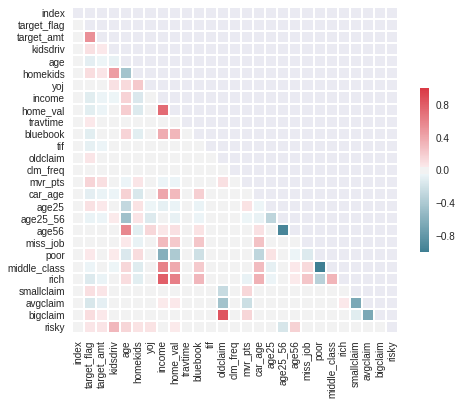

In [244]:
#Create a heatmap to check for correlated variables
# Compute the correlation matrix
corr = train1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
        square=True, linewidths=1, xticklabels = True, yticklabels = True, cbar_kws={"shrink": .5})

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


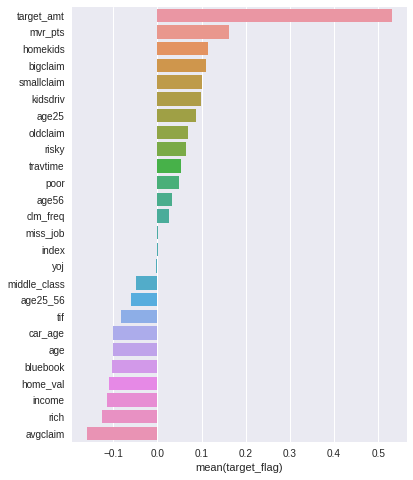

In [245]:
# Feature sorted by correlation to target wins, from positive to negative
corr = corr.sort_values('target_flag', ascending=False)
plt.figure(figsize=(6,8))
sns.barplot( corr.target_flag[1:], corr.index[1:], orient='h')
plt.show()

In [0]:
# log transform train variables (start with yoj and clm_freq)
train1["log_yoj"] = train1['yoj'].apply(np.log)
train1["log_clm_freq"] = train1['clm_freq'].apply(np.log)
train1["log_home_val"] = train1['home_val'].apply(np.log)
train1["log_oldclaim"] = train1['oldclaim'].apply(np.log)

In [0]:
# log transform test variables
test1["log_yoj"] = test1['yoj'].apply(np.log)
test1["log_clm_freq"] = test1['clm_freq'].apply(np.log)
test1["log_home_val"] = test1['home_val'].apply(np.log)
test1["log_oldclaim"] = test1['oldclaim'].apply(np.log)

In [248]:
# model 1: shell code - example for a simple model #
logit1 = smf.logit('target_flag ~ education+mstatus+tif+kidsdriv+mvr_pts', data=train1)  
result = logit1.fit()  
print (result.summary2())
print (result.conf_int())
dir(logit1)

Optimization terminated successfully.
         Current function value: 0.536924
         Iterations 6
                              Results: Logit
Model:                   Logit               No. Iterations:      6.0000   
Dependent Variable:      target_flag         Pseudo R-squared:    0.068    
Date:                    2019-02-22 23:16    AIC:                 8232.9418
No. Observations:        7650                BIC:                 8295.4239
Df Model:                8                   Log-Likelihood:      -4107.5  
Df Residuals:            7641                LL-Null:             -4405.7  
Converged:               1.0000              Scale:               1.0000   
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                  -1.6206   0.0982 -16.5107 0.0000 -1.8130 -1.4283
education[T.Bache

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_perfect_pred',
 '_data_attr',
 '_derivative_exog',
 '_derivative_predict',
 '_get_init_kwds',
 '_handle_data',
 '_init_keys',
 'cdf',
 'cov_params_func_l1',
 'data',
 'df_model',
 'df_resid',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'fit_regularized',
 'formula',
 'from_formula',
 'hessian',
 'information',
 'initialize',
 'jac',
 'k_constant',
 'loglike',
 'loglikeobs',
 'pdf',
 'predict',
 'raise_on_perfect_prediction',
 'score',
 'score_obs']

In [249]:
# model 2 #
logit1 = smf.logit('target_flag ~ education+job+car_type+mstatus+urbanicity+parent1+revoked+oldclaim+log_home_val+income+log_yoj+log_clm_freq+travtime+bluebook+tif+age+kidsdriv+mvr_pts', data=train1)  
result = logit1.fit()  
print (result.summary2())
print (result.conf_int())
dir(logit1)

Optimization terminated successfully.
         Current function value: 0.458759
         Iterations 7
                                   Results: Logit
Model:                      Logit                  No. Iterations:         7.0000   
Dependent Variable:         target_flag            Pseudo R-squared:       0.203    
Date:                       2019-02-22 23:16       AIC:                    7085.0068
No. Observations:           7650                   BIC:                    7314.1080
Df Model:                   32                     Log-Likelihood:         -3509.5  
Df Residuals:               7617                   LL-Null:                -4405.7  
Converged:                  1.0000                 Scale:                  1.0000   
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_perfect_pred',
 '_data_attr',
 '_derivative_exog',
 '_derivative_predict',
 '_get_init_kwds',
 '_handle_data',
 '_init_keys',
 'cdf',
 'cov_params_func_l1',
 'data',
 'df_model',
 'df_resid',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'fit_regularized',
 'formula',
 'from_formula',
 'hessian',
 'information',
 'initialize',
 'jac',
 'k_constant',
 'loglike',
 'loglikeobs',
 'pdf',
 'predict',
 'raise_on_perfect_prediction',
 'score',
 'score_obs']

In [250]:
# ***model 3: winning model*** #
logit1 = smf.logit('target_flag ~ kidsdriv+age+parent1+mstatus+education+job+travtime+car_use+bluebook+tif+car_type+oldclaim+clm_freq+revoked+mvr_pts+urbanicity+age25_56+middle_class+rich+smallclaim+avgclaim+risky+log_yoj+log_clm_freq+log_home_val', data=train1)  
result = logit1.fit()  
print (result.summary2())
print (result.conf_int())
dir(logit1)

Optimization terminated successfully.
         Current function value: 0.444300
         Iterations 7
                                   Results: Logit
Model:                      Logit                  No. Iterations:         7.0000   
Dependent Variable:         target_flag            Pseudo R-squared:       0.229    
Date:                       2019-02-22 23:16       AIC:                    6877.7916
No. Observations:           7650                   BIC:                    7155.4900
Df Model:                   39                     Log-Likelihood:         -3398.9  
Df Residuals:               7610                   LL-Null:                -4405.7  
Converged:                  1.0000                 Scale:                  1.0000   
------------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_perfect_pred',
 '_data_attr',
 '_derivative_exog',
 '_derivative_predict',
 '_get_init_kwds',
 '_handle_data',
 '_init_keys',
 'cdf',
 'cov_params_func_l1',
 'data',
 'df_model',
 'df_resid',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'fit_regularized',
 'formula',
 'from_formula',
 'hessian',
 'information',
 'initialize',
 'jac',
 'k_constant',
 'loglike',
 'loglikeobs',
 'pdf',
 'predict',
 'raise_on_perfect_prediction',
 'score',
 'score_obs']

In [251]:
#use model 3 to predict for the test data
preds = result.predict(test1)
preds.head
pred_out = test1.loc[:,['index','target_flag']]
pred_out['p_target_flag'] = preds[: ]
pred_out.head

<bound method NDFrame.head of       index  target_flag  p_target_flag
0         3          0.0       0.098801
1         9          0.0       0.205666
2        10          0.0       0.127432
3        18          0.0       0.277829
4        21          0.0       0.130231
...     ...          ...            ...
2136  10279          0.0       0.258694
2137  10281          0.0       0.016563
2138  10285          0.0       0.006249
2139  10294          0.0       0.163172
2140  10300          0.0       0.171983

[2141 rows x 3 columns]>

In [252]:
# Crash data where target_amt > 0
train1.shape
train_crash = train1[train1['target_amt'] != 0]
train_crash.shape
train_crash.head

<bound method NDFrame.head of       index  target_flag   target_amt  kidsdriv   age  homekids   yoj     income parent1   home_val mstatus  sex  \
5         7            1  2946.000000         0  34.0         1  12.0  125301.00     Yes  206898.00    z_No  z_F   
7        11            1  4021.000000         1  37.0         2  12.0  107961.00      No  333680.00     Yes    M   
8        12            1  2501.000000         0  34.0         0  10.0   62978.00      No  206898.00    z_No  z_F   
10       14            1  6077.000000         0  53.0         0  14.0   77100.00      No  206898.00    z_No  z_F   
13       17            1  1267.000000         0  53.0         0  11.0  130795.00      No  206898.00    z_No    M   
...     ...          ...          ...       ...   ...       ...   ...        ...     ...        ...     ...  ...   
8133  10263            1  3106.000000         0  47.0         0  13.0  214730.01      No  497746.00    z_No    M   
8134  10265            1   471.115458     

#### OLS Regression to predict target_amt

In [253]:
reg_model = smf.ols(formula= 'target_amt ~ bluebook+car_age', data=train_crash).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:             target_amt   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     15.86
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           1.46e-07
Time:                        23:16:42   Log-Likelihood:                -20868.
No. Observations:                2010   AIC:                         4.174e+04
Df Residuals:                    2007   BIC:                         4.176e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4371.0307    395.212     11.060      0.0

In [254]:
# Used ols model to predict target_amt
# Used the mean for target_amt 5727 to fillna
small = train_crash.loc[:,['index','target_amt']]
print(small.describe())
pred_out['p_target_amt'] = (4371 + 0.1223*train1.bluebook - 52.4897*train1.car_age)
pred_out['p_target_amt'] = pred_out['p_target_amt'].fillna(5727)
pred_out.head

              index     target_amt
count   2010.000000    2010.000000
mean    5143.227363    5727.737978
std     2964.951837    7872.406113
min        7.000000      30.277280
25%     2554.250000    2615.250000
50%     5187.500000    4125.000000
75%     7646.750000    5785.750000
max    10288.000000  107586.136160


<bound method NDFrame.head of       index  target_flag  p_target_flag  p_target_amt
0         3          0.0       0.098801    5166.51440
1         9          0.0       0.205666    6145.67230
2        10          0.0       0.127432    4336.52600
3        18          0.0       0.277829    5944.37380
4        21          0.0       0.130231    5680.07510
...     ...          ...            ...           ...
2136  10279          0.0       0.258694    5514.47360
2137  10281          0.0       0.016563    8407.86215
2138  10285          0.0       0.006249    6653.28520
2139  10294          0.0       0.163172    5327.95040
2140  10300          0.0       0.171983    5483.40210

[2141 rows x 4 columns]>

In [255]:
#watch your record count should be 2141
your_model = pred_out.loc[:,['index','p_target_flag','p_target_amt']]  
your_model.head 
#your_model.to_csv('/Users/rmorlows/Desktop/MSDS411/Assignment 02/hw02_predictions.csv')

<bound method NDFrame.head of       index  p_target_flag  p_target_amt
0         3       0.098801    5166.51440
1         9       0.205666    6145.67230
2        10       0.127432    4336.52600
3        18       0.277829    5944.37380
4        21       0.130231    5680.07510
...     ...            ...           ...
2136  10279       0.258694    5514.47360
2137  10281       0.016563    8407.86215
2138  10285       0.006249    6653.28520
2139  10294       0.163172    5327.95040
2140  10300       0.171983    5483.40210

[2141 rows x 3 columns]>

In [256]:
# Expected Loss is amount times probability
p_expected_loss = (your_model.p_target_flag*your_model.p_target_amt)
p_expected_loss

0        510.456445
1       1263.957340
2        552.611438
3       1651.521100
4        739.723929
           ...     
2136    1426.559847
2137     139.261895
2138      41.573131
2139     869.369899
2140     943.050629
Length: 2141, dtype: float64

#### Shell Code Model AUC & ROC Curve

In [0]:
#Some additional code for a reduced model to create the ROC curve and calculate AUC
import pandas as pd
import statsmodels as sm
from sklearn import linear_model, metrics

In [0]:
train1['constant'] = 1
X = train1[['tif','kidsdriv','mvr_pts','constant']].copy()
y = train1[['target_flag']].copy()

In [259]:
#  a different look logistic regression model
logit = sm.api.Logit(train1['target_flag'], train1[['tif','kidsdriv','mvr_pts','constant']])
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.556002
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            No. Iterations:   5.0000   
Dependent Variable: target_flag      Pseudo R-squared: 0.035    
Date:               2019-02-22 23:16 AIC:              8514.8300
No. Observations:   7650             BIC:              8542.5998
Df Model:           3                Log-Likelihood:   -4253.4  
Df Residuals:       7646             LL-Null:          -4405.7  
Converged:          1.0000           Scale:            1.0000   
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
tif         -0.0470    0.0068   -6.9523  0.0000  -0.0603  -0.0338
kidsdriv     0.3815    0.0479    7.9605  0.0000   0.2875   0.4754
mvr_pts      0.2394    0.0177   13.5358  0.0000   0.2047   0.2740
constant    -1.6142    0.0719  -22.4415  0.0000  -1.7552  -1.4732
================================================================

"""

In [260]:
# sklearn model  to calculate AUC / create ROC curve
logit = linear_model.LogisticRegression()
model = logit.fit(train1[['tif','kidsdriv','mvr_pts','constant']], train1['target_flag'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# calculate the predicted probabilities
preds = model.predict_proba(train1[['tif','kidsdriv','mvr_pts','constant']])[:,1]
fpr, tpr, _ = metrics.roc_curve(train1['target_flag'], preds)

In [262]:
# calculate AUC and create ROC curve
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.6123453212660103


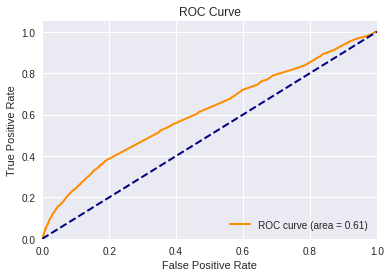

In [263]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [264]:
#Finally for the Hosmer-Lemeshow Lack of Fit
pred_train = result.predict(X)
pred_train.head
pred_out = train1.loc[:,['index','target_flag']]
pred_out['p_target_flag'] = pred_train[: ]
pred_out.head 
#sort by pred
result1 = pred_out.sort_values(by=('p_target_flag'))
print (result1)

      index  target_flag  p_target_flag
4466   5630            0       0.102072
338     422            1       0.102072
7401   9353            0       0.102072
1174   1477            0       0.102072
7847   9908            0       0.102072
...     ...          ...            ...
4133   5202            1       0.743577
5821   7350            1       0.778505
7819   9869            1       0.801879
5464   6910            1       0.801879
3772   4747            0       0.855639

[7650 rows x 3 columns]


In [265]:
#rank by decile
result2 = pd.qcut(result1['p_target_flag'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
print (result2)
d1 = {'g' : result2}
df3 = pd.DataFrame(data=d1)
print (df3)
result3 = pd.concat([result1, df3], axis=1, join_axes=[result1.index])
print (result3)

sums = result3.groupby('g')
sums1 = sums.aggregate(np.sum)
print (sums1)

4466     1
338      1
7401     1
1174     1
7847     1
        ..
4133    10
5821    10
7819    10
5464    10
3772    10
Name: p_target_flag, Length: 7650, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
       g
4466   1
338    1
7401   1
1174   1
7847   1
...   ..
4133  10
5821  10
7819  10
5464  10
3772  10

[7650 rows x 1 columns]
      index  target_flag  p_target_flag   g
4466   5630            0       0.102072   1
338     422            1       0.102072   1
7401   9353            0       0.102072   1
1174   1477            0       0.102072   1
7847   9908            0       0.102072   1
...     ...          ...            ...  ..
4133   5202            1       0.743577  10
5821   7350            1       0.778505  10
7819   9869            1       0.801879  10
5464   6910            1       0.801879  10
3772   4747            0       0.855639  10

[7650 rows x 4 columns]
      index  target_flag  p_target_flag
g                                      
1  

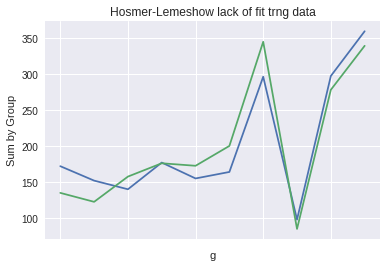

In [266]:
#plot target_flag vs pred
def scat(dataframe,var1,var2,var3):     
    dataframe[var2].plot()     
    dataframe[var3].plot()     
    plt.title('Hosmer-Lemeshow lack of fit trng data')     
    plt.xlabel(var1)     
    plt.ylabel('Sum by Group')
scat(sums1, 'g', 'target_flag', 'p_target_flag')
#save as jpeg to place in your report
# plt.savefig('/Users/HLlackoffit1.jpeg')

In [0]:
# one-hot encode categorical variables into dummy values for train data
train1 = pd.get_dummies(train1, columns=["car_type","car_use","education","job","mstatus","parent1","red_car","revoked","sex","urbanicity"])

In [0]:
# one-hot encode categorical variables into dummy values for test data
test1 = pd.get_dummies(test1, columns=["car_type","car_use","education","job","mstatus","parent1","red_car","revoked","sex","urbanicity"])

#### Model 2 AUC & ROC Curve

In [0]:
X = train1[['education_<High School','education_Bachelors','education_Masters','education_PhD','education_z_High School','job_Clerical','job_Doctor','job_Home Maker','job_Lawyer','job_Manager','job_Professional','job_Student','job_z_Blue Collar','mstatus_Yes','mstatus_z_No','parent1_No','parent1_Yes','car_type_Minivan','car_type_Panel Truck','car_type_Pickup','car_type_Sports Car','car_type_Van','car_type_z_SUV','car_use_Commercial','car_use_Private','urbanicity_Highly Urban/ Urban','urbanicity_z_Highly Rural/ Rural','oldclaim','log_home_val','income','log_yoj','log_clm_freq','travtime','bluebook','tif','age','kidsdriv','mvr_pts','constant']].copy()
y = train1[['target_flag']].copy()

In [270]:
#  a different look logistic regression model
logit = sm.api.Logit(train1['target_flag'], train1[['education_<High School','education_Bachelors','education_Masters','education_PhD','education_z_High School','job_Clerical','job_Doctor','job_Home Maker','job_Lawyer','job_Manager','job_Professional','job_Student','job_z_Blue Collar','mstatus_Yes','mstatus_z_No','parent1_No','parent1_Yes','car_type_Minivan','car_type_Panel Truck','car_type_Pickup','car_type_Sports Car','car_type_Van','car_type_z_SUV','car_use_Commercial','car_use_Private','urbanicity_Highly Urban/ Urban','urbanicity_z_Highly Rural/ Rural','oldclaim','log_home_val','income','log_yoj','log_clm_freq','travtime','bluebook','tif','age','kidsdriv','mvr_pts','constant']])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.459186
         Iterations 14


In [271]:
# sklearn model  to calculate AUC / create ROC curve
logit = linear_model.LogisticRegression()
model = logit.fit(train1[['education_<High School','education_Bachelors','education_Masters','education_PhD','education_z_High School','job_Clerical','job_Doctor','job_Home Maker','job_Lawyer','job_Manager','job_Professional','job_Student','job_z_Blue Collar','mstatus_Yes','mstatus_z_No','parent1_No','parent1_Yes','car_type_Minivan','car_type_Panel Truck','car_type_Pickup','car_type_Sports Car','car_type_Van','car_type_z_SUV','car_use_Commercial','car_use_Private','urbanicity_Highly Urban/ Urban','urbanicity_z_Highly Rural/ Rural','oldclaim','log_home_val','income','log_yoj','log_clm_freq','travtime','bluebook','tif','age','kidsdriv','mvr_pts','constant']], train1['target_flag'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# calculate the predicted probabilities
preds = model.predict_proba(train1[['education_<High School','education_Bachelors','education_Masters','education_PhD','education_z_High School','job_Clerical','job_Doctor','job_Home Maker','job_Lawyer','job_Manager','job_Professional','job_Student','job_z_Blue Collar','mstatus_Yes','mstatus_z_No','parent1_No','parent1_Yes','car_type_Minivan','car_type_Panel Truck','car_type_Pickup','car_type_Sports Car','car_type_Van','car_type_z_SUV','car_use_Commercial','car_use_Private','urbanicity_Highly Urban/ Urban','urbanicity_z_Highly Rural/ Rural','oldclaim','log_home_val','income','log_yoj','log_clm_freq','travtime','bluebook','tif','age','kidsdriv','mvr_pts','constant']])[:,1]
fpr, tpr, _ = metrics.roc_curve(train1['target_flag'], preds)

In [273]:
# calculate AUC and create ROC curve
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.624906143043647


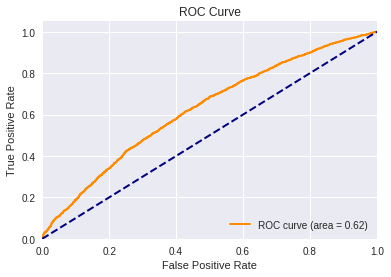

In [274]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [0]:
#Finally for the Hosmer-Lemeshow Lack of Fit
pred_train = result.predict(X)
pred_train.head
pred_out = train1.loc[:,['index','target_flag']]
pred_out['p_target_flag'] = pred_train[: ]
pred_out.head 
#sort by pred
result1 = pred_out.sort_values(by=('p_target_flag'))

In [0]:
#rank by decile
result2 = pd.qcut(result1['p_target_flag'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
#print (result2)
d1 = {'g' : result2}
df3 = pd.DataFrame(data=d1)
#print (df3)
result3 = pd.concat([result1, df3], axis=1, join_axes=[result1.index])
#print (result3)

sums = result3.groupby('g')
sums1 = sums.aggregate(np.sum)

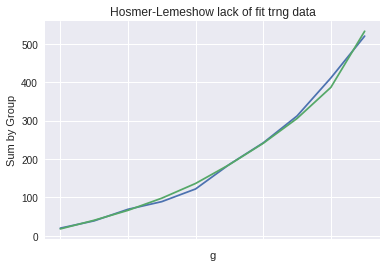

In [277]:
#plot target_flag vs pred
def scat(dataframe,var1,var2,var3):     
    dataframe[var2].plot()     
    dataframe[var3].plot()     
    plt.title('Hosmer-Lemeshow lack of fit trng data')     
    plt.xlabel(var1)     
    plt.ylabel('Sum by Group')
scat(sums1, 'g', 'target_flag', 'p_target_flag')
#save as jpeg to place in your report
# plt.savefig('/Users/HLlackoffit2.jpeg')

#### Model 3 AUC & ROC Curve

In [0]:
X = train1[['education_<High School','education_Bachelors','education_Masters','education_PhD','education_z_High School','job_Clerical','job_Doctor','job_Home Maker','job_Lawyer','job_Manager','job_Professional','job_Student','job_z_Blue Collar','mstatus_Yes','mstatus_z_No','parent1_No','parent1_Yes','car_type_Minivan','car_type_Panel Truck','car_type_Pickup','car_type_Sports Car','car_type_Van','car_type_z_SUV','car_use_Commercial','car_use_Private','urbanicity_Highly Urban/ Urban','urbanicity_z_Highly Rural/ Rural','kidsdriv','age','travtime','bluebook','tif','oldclaim','clm_freq','mvr_pts','age25_56','middle_class','rich','smallclaim','avgclaim','risky','log_yoj','log_clm_freq','log_home_val','constant']].copy()
y = train1[['target_flag']].copy()

In [279]:
#  a different look logistic regression model
logit = sm.api.Logit(train1['target_flag'], train1[['education_<High School','education_Bachelors','education_Masters','education_PhD','education_z_High School','job_Clerical','job_Doctor','job_Home Maker','job_Lawyer','job_Manager','job_Professional','job_Student','job_z_Blue Collar','mstatus_Yes','mstatus_z_No','parent1_No','parent1_Yes','car_type_Minivan','car_type_Panel Truck','car_type_Pickup','car_type_Sports Car','car_type_Van','car_type_z_SUV','car_use_Commercial','car_use_Private','urbanicity_Highly Urban/ Urban','urbanicity_z_Highly Rural/ Rural','kidsdriv','age','travtime','bluebook','tif','oldclaim','clm_freq','mvr_pts','age25_56','middle_class','rich','smallclaim','avgclaim','risky','log_yoj','log_clm_freq','log_home_val','constant']])
result = logit.fit()

         Current function value: 0.449700
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [280]:
# sklearn model  to calculate AUC / create ROC curve
logit = linear_model.LogisticRegression()
model = logit.fit(train1[['education_<High School','education_Bachelors','education_Masters','education_PhD','education_z_High School','job_Clerical','job_Doctor','job_Home Maker','job_Lawyer','job_Manager','job_Professional','job_Student','job_z_Blue Collar','mstatus_Yes','mstatus_z_No','parent1_No','parent1_Yes','car_type_Minivan','car_type_Panel Truck','car_type_Pickup','car_type_Sports Car','car_type_Van','car_type_z_SUV','car_use_Commercial','car_use_Private','urbanicity_Highly Urban/ Urban','urbanicity_z_Highly Rural/ Rural','kidsdriv','age','travtime','bluebook','tif','oldclaim','clm_freq','mvr_pts','age25_56','middle_class','rich','smallclaim','avgclaim','risky','log_yoj','log_clm_freq','log_home_val','constant']], train1['target_flag'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# calculate the predicted probabilities
preds = model.predict_proba(train1[['education_<High School','education_Bachelors','education_Masters','education_PhD','education_z_High School','job_Clerical','job_Doctor','job_Home Maker','job_Lawyer','job_Manager','job_Professional','job_Student','job_z_Blue Collar','mstatus_Yes','mstatus_z_No','parent1_No','parent1_Yes','car_type_Minivan','car_type_Panel Truck','car_type_Pickup','car_type_Sports Car','car_type_Van','car_type_z_SUV','car_use_Commercial','car_use_Private','urbanicity_Highly Urban/ Urban','urbanicity_z_Highly Rural/ Rural','kidsdriv','age','travtime','bluebook','tif','oldclaim','clm_freq','mvr_pts','age25_56','middle_class','rich','smallclaim','avgclaim','risky','log_yoj','log_clm_freq','log_home_val','constant']])[:,1]
fpr, tpr, _ = metrics.roc_curve(train1['target_flag'], preds)

In [282]:
# calculate AUC and create ROC curve
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.7587032920503863


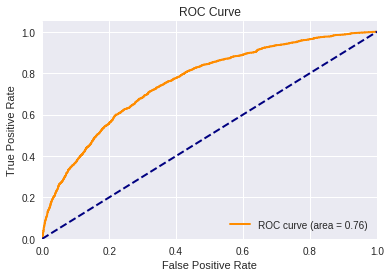

In [283]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [0]:
#Finally for the Hosmer-Lemeshow Lack of Fit
pred_train = result.predict(X)
pred_train.head
pred_out = train1.loc[:,['index','target_flag']]
pred_out['p_target_flag'] = pred_train[: ]
pred_out.head 
#sort by pred
result1 = pred_out.sort_values(by=('p_target_flag'))

In [0]:
#rank by decile
result2 = pd.qcut(result1['p_target_flag'], 10, labels=[1,2,3,4,5,6,7,8,9,10])
#print (result2)
d1 = {'g' : result2}
df3 = pd.DataFrame(data=d1)
#print (df3)
result3 = pd.concat([result1, df3], axis=1, join_axes=[result1.index])
#print (result3)

sums = result3.groupby('g')
sums1 = sums.aggregate(np.sum)

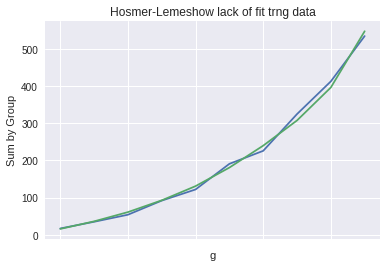

In [286]:
#plot target_flag vs pred
def scat(dataframe,var1,var2,var3):     
    dataframe[var2].plot()     
    dataframe[var3].plot()     
    plt.title('Hosmer-Lemeshow lack of fit trng data')     
    plt.xlabel(var1)     
    plt.ylabel('Sum by Group')
scat(sums1, 'g', 'target_flag', 'p_target_flag')
#save as jpeg to place in your report
# plt.savefig('Users/HLlackoffit3.jpeg')

#### Conclusion

Several models were developed and tested to predict the probability of a car crash from insurance data. The best logistic regression model was derived using a model with select log transformed variables (yoj, claim frequency, home value), binned variables (age, old claim, income), new variable (risky), and the remaining variables with low p-values as predictors of the target flag. Other models were tested that resulted in similar Psuedo R-squared values, but the model selected had a low AIC, high AUC, and low RMSE. Although there were no problems detected with the various logistic regression models, the selected model did include variables with coefficients that should be examined. It may be advantageous to consult an insurance expert before including or eliminating these variables from the model. Additionally, through EDA we dispelled some urban myths, uncovered skewed variables, and binned variables to improve model performance. This insurance dataset may potentially be leveraged for a probability-severity model, but is beyond the scope of this report.